In [ ]:
"Test portion"
from SIRModel import *
import matplotlib.pyplot as plt
import pandas as pd

sir = SIRModel(10000, 140)
sir.set_contact_rate(0.2)
sir.integrate()

S, I, R, t = sir.S, sir.I, sir.R, sir.t
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t, (I+R)/1000, 'm', alpha=0.5, lw=2, label="Confirmed cases")
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0, 10.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [16]:
us_records = pd.read_csv("./data/US_counties_COVID19_health_weather_data.csv")
population = pd.read_csv("./data/co-est2019-alldata.csv", encoding="latin").set_index("CTYNAME")

In [17]:
us_records.head(15)

,date,county,state,fips,cases,deaths,stay_at_home_announced,stay_at_home_effective,lat,lon,...,min_temp_3d_avg,min_temp_5d_avg,min_temp_10d_avg,min_temp_15d_avg,dewpoint_3d_avg,dewpoint_5d_avg,dewpoint_10d_avg,dewpoint_15d_avg,date_stay_at_home_announced,date_stay_at_home_effective
0,2020-01-21,Snohomish,Washington,53061,1,0,no,no,48.047489,-121.697307,...,38.266667,38.92,38.44,36.146667,40.333333,41.64,40.74,37.973333,2020-03-23,2020-03-23
1,2020-01-22,Snohomish,Washington,53061,1,0,no,no,48.047489,-121.697307,...,39.233333,41.12,39.76,37.613333,42.633333,42.98,41.68,39.440000,2020-03-23,2020-03-23
2,2020-01-23,Snohomish,Washington,53061,1,0,no,no,48.047489,-121.697307,...,42.900000,41.74,41.15,38.226667,44.733333,43.72,42.47,40.120000,2020-03-23,2020-03-23
3,2020-01-24,Cook,Illinois,17031,1,0,no,no,41.840039,-87.816716,...,32.366667,30.02,27.43,24.886667,31.433333,28.50,25.00,22.693333,2020-03-20,2020-03-21
4,2020-01-24,Snohomish,Washington,53061,1,0,no,no,48.047489,-121.697307,...,44.600000,42.54,41.75,38.226667,46.000000,44.30,42.88,41.293333,2020-03-23,2020-03-23
5,2020-01-25,Orange,California,06059,1,0,no,no,33.702979,-117.761091,...,51.700000,51.02,51.10,49.786667,51.333333,50.14,47.18,45.513333,2020-03-19,2020-03-19
6,2020-01-25,Cook,Illinois,17031,1,0,no,no,41.840039,-87.816716,...,32.000000,30.80,28.81,25.953333,32.233333,29.98,25.96,24.000000,2020-03-20,2020-03-21
7,2020-01-25,Snohomish,Washington,53061,1,0,no,no,48.047489,-121.697307,...,44.000000,43.38,40.78,39.166667,44.633333,44.28,42.55,42.280000,2020-03-23,2020-03-23
8,2020-01-26,Maricopa,Arizona,04013,1,0,no,no,33.348813,-112.491306,...,47.000000,46.76,46.04,46.760000,42.833333,39.94,38.72,37.553333,2020-03-30,2020-03-31
9,2020-01-26,Los Angeles,California,06037,1,0,no,no,34.358922,-118.217049,...,57.800000,56.84,58.10,57.200000,39.933333,36.46,32.72,33.026667,2020-03-19,2020-03-19


In [18]:
population.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
CTYNAME,,,,,,,,,,,,,,,,,,,,,
Alabama,40,3,6,1,0,Alabama,4779736,4780125,4785437,4799069,...,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
Autauga County,50,3,6,1,1,Alabama,54571,54597,54773,55227,...,4.847310,6.018182,-6.226119,-3.902226,1.970443,-1.712875,4.777171,0.849656,0.540916,4.560062
Baldwin County,50,3,6,1,3,Alabama,182265,182265,183112,186558,...,24.017829,16.641870,17.488579,22.751474,20.184334,17.725964,21.279291,22.398256,24.727215,24.380567
Barbour County,50,3,6,1,5,Alabama,27457,27455,27327,27341,...,-5.690302,0.292676,-6.897817,-8.132185,-5.140431,-15.724575,-18.238016,-24.998528,-8.754922,-5.165664
Bibb County,50,3,6,1,7,Alabama,22915,22915,22870,22745,...,1.385134,-4.998356,-3.787545,-5.797999,1.331144,1.329817,-0.708717,-3.234669,-6.857092,1.831952


In [19]:
population.loc["Cuyahoga County"]

SUMLEV              50
REGION               2
DIVISION             3
STATE               39
COUNTY              35
                ...   
RNETMIG2015    -4.6718
RNETMIG2016   -4.52787
RNETMIG2017   -5.53378
RNETMIG2018   -4.99257
RNETMIG2019   -5.75099
Name: Cuyahoga County, Length: 163, dtype: object

In [20]:
counties = us_records.county.unique()
county_specific = {elem: pd.DataFrame for elem in counties}
for county in county_specific.keys():
    county_specific[county] = us_records[:][us_records.county == county].reset_index()

In [89]:
county_name = "San Francisco"
county = county_specific[county_name]

26


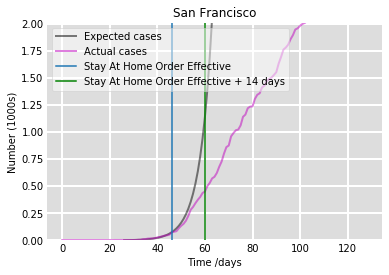

In [101]:
county_population = population.loc[county_name + " County"].POPESTIMATE2019
indexes_before_stay_at_home = len(county[county.stay_at_home_effective == 'no'].index)
buffer = indexes_before_stay_at_home - 20
county_pre = county[buffer:indexes_before_stay_at_home]
sir = SIRModel(county_population, len(county_pre.index))
sir.set_contact_rate(0.216)
sir.set_mean_recovery_rate(1./10)

def find_best_interval(min, interval, number, parameter_function):
    parameters = []
    minimum_cost = -1
    min_index = None
    for i in range(0, number):
        parameter_function(min + i * interval)
        sir.integrate()
        S, I, R, t = sir.S, sir.I, sir.R, sir.t
        parameters.append(min + i * interval)

        cost = sum(((I+R) ** 2) - (county_pre.cases ** 2))
        if minimum_cost == -1 or abs(cost) < minimum_cost:
            minimum_cost = abs(cost)
            min_index = i
    return parameters[min_index]

contact_rate = find_best_interval(0.04, 0.005, 100, sir.set_contact_rate)
contact_rate_accurate = find_best_interval(contact_rate - 0.003, 0.001, 5, sir.set_contact_rate)
mean_recovery_rate = find_best_interval(1./100,0.01, 50, sir.set_mean_recovery_rate)


model_sir = SIRModel(county_population, len(county.index))
model_sir.set_contact_rate(contact_rate_accurate)
model_sir.set_mean_recovery_rate(mean_recovery_rate)
model_sir.integrate()

stay_at_home_sir = SIRModel(county_population, len(county.index) - indexes_before_stay_at_home, R0=(model_sir.R[indexes_before_stay_at_home-buffer]), I0=model_sir.I[indexes_before_stay_at_home-buffer], contact_rate=0.18)
stay_at_home_sir.integrate()

S, I, R, t = model_sir.S, model_sir.I, model_sir.R, model_sir.t
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True, title=county_name)
# ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
# ax.plot(t +buffer, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
# ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t+buffer, (I+R)/1000, 'k', alpha=0.5, lw=2, label="Expected cases")
ax.plot(t, (county.cases/1000), 'm', alpha=0.5, lw=2, label="Actual cases")
# ax.plot(np.linspace(0, len(county.index) - indexes_before_stay_at_home-1, len(county.index) - indexes_before_stay_at_home) + indexes_before_stay_at_home, (stay_at_home_sir.I + stay_at_home_sir.R)/1000,  'b', alpha=0.5, lw=2, label="Expected cases stay at home")
stay_at_home_order_index = len(county[county.stay_at_home_effective == "no"].index)
ax.axvline(stay_at_home_order_index, label="Stay At Home Order Effective")
ax.axvline(stay_at_home_order_index + 14, label="Stay At Home Order Effective + 14 days", color="g")
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0, max(county.cases)/1000)

ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
print(buffer)
plt.show()

In [97]:
I+R


array([1.00000000e+00, 1.32572637e+00, 1.72158489e+00, 2.20267558e+00,
       2.78734973e+00, 3.49790925e+00, 4.36145832e+00, 5.41093633e+00,
       6.68637448e+00, 8.23642251e+00, 1.01202039e+01, 1.24095711e+01,
       1.51918444e+01, 1.85731427e+01, 2.26824285e+01, 2.76764248e+01,
       3.37455887e+01, 4.11213702e+01, 5.00850314e+01, 6.09783609e+01,
       7.42166908e+01, 9.03047089e+01, 1.09855664e+02, 1.33614693e+02,
       1.62487139e+02, 1.97572948e+02, 2.40208400e+02, 2.92016767e+02,
       3.54969753e+02, 4.31462011e+02, 5.24401450e+02, 6.37318634e+02,
       7.74499204e+02, 9.41144037e+02, 1.14356273e+03, 1.38940709e+03,
       1.68795232e+03, 2.05043526e+03, 2.49045988e+03, 3.02448237e+03,
       3.67238912e+03, 4.45818223e+03, 5.41078810e+03, 6.56500442e+03,
       7.96259915e+03, 9.65357146e+03, 1.16975767e+04, 1.41655047e+04,
       1.71411811e+04, 2.07231296e+04, 2.50262905e+04, 3.01835323e+04,
       3.63467097e+04, 4.36869335e+04, 5.23935988e+04, 6.26716194e+04,
      

In [98]:
us_records.sample(10)

,date,county,state,fips,cases,deaths,stay_at_home_announced,stay_at_home_effective,lat,lon,...,min_temp_3d_avg,min_temp_5d_avg,min_temp_10d_avg,min_temp_15d_avg,dewpoint_3d_avg,dewpoint_5d_avg,dewpoint_10d_avg,dewpoint_15d_avg,date_stay_at_home_announced,date_stay_at_home_effective
49607,2020-04-11,Grady,Oklahoma,40051,11,0,no,no,35.016946,-97.884125,...,45.100000,43.68,43.69,42.746667,45.500000,41.80,42.49,42.313333,NaN,NaN
39981,2020-04-07,Jefferson,West Virginia,54037,31,0,yes,yes,39.307586,-77.862800,...,47.666667,45.18,41.80,42.466667,44.200000,43.16,35.77,36.120000,2020-03-23,2020-03-24
53290,2020-04-13,Adams,Colorado,08001,693,26,yes,yes,39.873635,-104.337782,...,15.300000,18.76,22.46,26.580000,15.900000,17.28,22.03,23.086667,2020-03-26,2020-03-26
2804,2020-03-16,Okaloosa,Florida,12091,1,0,no,no,30.691297,-86.591760,...,55.066667,57.80,59.48,58.046667,58.566667,60.24,62.30,61.046667,2020-04-01,2020-04-03
21346,2020-03-30,Berkeley,West Virginia,54003,14,0,yes,yes,39.464076,-78.027518,...,44.966667,43.78,40.90,40.333333,41.733333,42.98,38.92,38.640000,2020-03-23,2020-03-24
7193,2020-03-22,Leon,Florida,12073,4,0,no,no,30.458049,-84.277896,...,61.333333,60.62,61.19,60.346667,63.433333,62.92,63.58,63.260000,2020-04-01,2020-04-03
50938,2020-04-12,Adams,Idaho,16003,1,0,yes,yes,44.889598,-116.453838,...,21.033333,20.42,22.62,23.673333,15.800000,16.80,18.92,21.300000,2020-03-25,2020-03-25
89556,2020-04-26,Livingston,Kentucky,21139,1,0,yes,yes,37.209633,-88.353726,...,46.633333,47.20,45.48,NaN,45.100000,47.40,46.35,44.920000,2020-03-22,2020-03-26
35175,2020-04-06,Russell,Alabama,01113,10,0,yes,yes,32.288402,-85.184929,...,50.200000,50.32,47.48,48.520000,58.266667,58.66,52.16,52.306667,2020-04-03,2020-04-04
32718,2020-04-05,Butler,Alabama,01013,1,0,yes,yes,31.752418,-86.680303,...,55.733333,55.24,55.84,56.166667,52.333333,51.86,51.20,50.766667,2020-04-03,2020-04-04


In [99]:
from sklearn.metrics import r2_score
sir.set_contact_rate(contact_rate_accurate)
sir.set_mean_recovery_rate(mean_recovery_rate)
sir.integrate()
r2_score((county_pre.cases/1000), (sir.I+sir.R)/1000)


0.9481946395469701

In [100]:
r2_score(county.cases[buffer:]/1000, (I+R)[:-buffer]/1000)

-83916.41969322495